# The use of bag-of-words representations

Bag-of-words representations are the building block of our analyses of word meanings. While we might change the way we define the "bag" or context surrounding our words, the **representation** we use is numerically what we want to work with -- a large, high-dimensional, extremely sparse vector.

This may be surprising to you because we have talked a lot about sparsity being a bad thing. However, for distributional semantics, it is good to be sparse because sparser is faster. We still run into estimation issues for very low-frequency events, however.

# What are word vectors?

Today and Friday will cover how we actually use the bag-of-words representations to obtain word vectors.

Recall that word vectors basically define a word as both a point in a high-dimensional space.
* Dimensionality (number of dimensions) varies by method
* Float or real-valued vectors are usually smaller (100-1000 dimensions)
* Integer or count-based, bag-of-words vectors are much larger (10k - millions of dimensions)

The **real-valued** (`float`) vectors get a lot of use because they compress lots of co-occurrence information into them. They are easy to compute standard algebraic transformations with, relative to count-based representations.

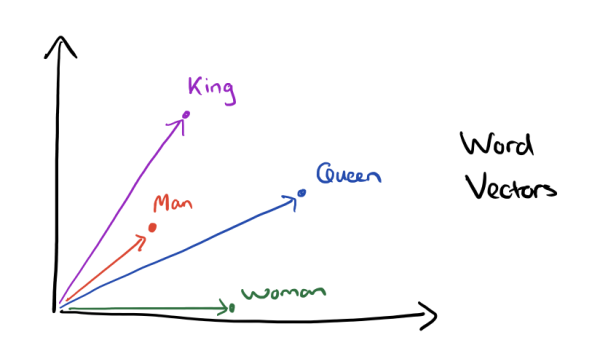

## Why do we want real-valued vectors?

Consider the definition of **Euclidean distance**. If you want to compute the Euclidean distance between two arbitrary vectors $X$ and $Y$,

$\sqrt{\sum_i (X_i - Y_i) ^ 2}$

you would be able to compute that with this code snippet:

```python

def euclidean_distance(first_list: list, second_list: list):
  from numpy import sqrt

  running_sum = 0.
  for i, number in enumerate(first_list):
    second_number = second_list[i]
    difference = number - second_number
    squared_difference = difference ** 2
    running_sum += squared_difference
  distance = sqrt(running_sum)
  return distance
```

If we take two simple count vectors that we can conceive of as bag-of-words representations:

```python
first_list = [0, 0, 0, 0, 4, 4]
second_list = [4, 4, 0, 0, 0, 0]

euclidean_distance(first_list, second_list)
```

returns `8.0`. Euclidean distance is well-behaved with 0s. But note that if there is no overlap whatsoever between `first_list` and `second_list` then the end result depends mostly on the number of non-zero dimensions. We will get _huge_ differences between vectors with even a small number of sparse dimensions.

Importantly, many of the other calculations that we do *do* depend on 0s. For example, the **dot product**:

$a \cdot b = \sum_{i=1}^{n} a_i b_i = a_1 b_1 + a_2 b _2 + ... a_n b_n$

```python
def dot_product(first_list: list, second_list: list):
  running_sum = 0.
  for i, f_num in enumerate(first_list):
    s_num = second_list[i]
    mult = f_num * s_num
    running_sum += mult
  return running_sum
```

Let's compare `dot_product` with `euclidean_distance` with our old lists:

In [1]:
def euclidean_distance(first_list: list, second_list: list):
  from numpy import sqrt

  running_sum = 0.
  for i, number in enumerate(first_list):
    second_number = second_list[i]
    difference = number - second_number
    squared_difference = difference ** 2
    running_sum += squared_difference
  distance = sqrt(running_sum)
  return distance

def dot_product(first_list: list, second_list: list):
  running_sum = 0.
  for i, f_num in enumerate(first_list):
    s_num = second_list[i]
    mult = f_num * s_num
    running_sum += mult
  return running_sum

In [2]:
first_list = [0, 0, 0, 0, 4, 4]
second_list = [4, 4, 0, 0, 0, 0]

print(f"Dot product: {dot_product(first_list, second_list)}")
print(f"Euclidean distance: {euclidean_distance(first_list, second_list)}")

Dot product: 0.0
Euclidean distance: 8.0


Let's compare to standard numerical packages for Python just to be sure

In [3]:
from scipy.spatial.distance import euclidean
from numpy import dot

print(f"Dot product: {dot(first_list, second_list)}")
print(f"Euclidean distance: {euclidean(first_list, second_list)}")

Dot product: 0
Euclidean distance: 8.0


## Getting word vectors from spaCy

`spaCy` can give us word vectors directly -- using the `.vector` method, similar to `.text` or `.dep_` etc. Let's see this in action now that we have tokenized our files:

In [4]:
# uncomment this if you get an error that there is no model
# !python -m spacy download en_core_web_lg

In [5]:
import spacy

nlp = spacy.load("en_core_web_lg") # this will take a moment to load
# this model is LORGE

one_paragraph = nlp("The family lives next to a dark forest," \
                    "a place tied to witchcraft in their culture, which" \
                    "underlines the conflict between their civilized, " \
                    "patriarchal religion and the Gothic, wild natural world " \
                    "that surrounds them.")

for token in one_paragraph[0:10]: # first ten words
  vector = token.vector
  print(vector[0:10]) # first ten dimensions

[ 0.27204   -0.06203   -0.1884     0.023225  -0.018158   0.0067192
 -0.13877    0.17708    0.17709    2.5882   ]
[-0.012915  0.37364  -0.13332  -0.28754   0.34285  -0.13437   0.31249
 -0.46877   0.21565   3.2295  ]
[ 0.2327    0.24516  -0.034873 -0.077669 -0.17177   0.023523 -0.18226
  0.07549   0.16174   3.7264  ]
[ 0.32809   0.13737   0.025431 -0.018135  0.44412  -0.3083   -0.33507
  0.12507   0.17775   2.5936  ]
[ 0.31924   0.06316  -0.27858   0.2612    0.079248 -0.21462  -0.10495
  0.15495  -0.03353   2.4834  ]
[ 0.043798  0.024779 -0.20937   0.49745   0.36019  -0.37503  -0.052078
 -0.60555   0.036744  2.2085  ]
[ 0.23697   -0.012691   0.025805   0.08769    0.0040656 -0.15164
 -0.31749    0.23952   -0.13993    1.5393   ]
[ 0.30399  0.20476 -0.5905  -0.51327 -0.29726  0.67423  0.28085  0.34539
 -1.0794   2.0834 ]
[-0.082752   0.67204   -0.14987   -0.064983   0.056491   0.40228
  0.0027747 -0.3311    -0.30691    2.0817   ]
[ 0.043798  0.024779 -0.20937   0.49745   0.36019  -0.37503  

## Concatenate all abstracts together to get a big matrix of vectors for each word

In [6]:
import numpy as np

my_vectors = [token.vector for token in one_paragraph]
# make all vectors one big matrix
my_matrix = np.array(my_vectors)
print()
# find out how big it is -- # of records, # of features
print(f"Number of dimensions: {my_matrix.shape}")


Number of dimensions: (38, 300)


What does this dimensionality tell us about the contents of `one_paragraph`?

In [7]:
my_matrix

array([[ 0.27204 , -0.06203 , -0.1884  , ...,  0.13015 , -0.18317 ,
         0.1323  ],
       [-0.012915,  0.37364 , -0.13332 , ..., -0.3807  , -0.062887,
        -0.22051 ],
       [ 0.2327  ,  0.24516 , -0.034873, ...,  0.023117, -0.37911 ,
        -0.65019 ],
       ...,
       [ 0.9089  ,  0.30283 ,  0.01706 , ...,  0.34004 , -0.012891,
         0.25162 ],
       [-0.10545 , -0.11458 , -0.39382 , ..., -0.10723 ,  0.26568 ,
         0.062161],
       [ 0.012001,  0.20751 , -0.12578 , ...,  0.13871 , -0.36049 ,
        -0.035   ]], dtype=float32)

## Basic word vector operations -- Distance metrics

The simplest way to compute the similarity of two vectors is to use the **Euclidean distance** measure. This measure assumes that each vector is basically a point in space, and that the distance between two vectors is the difference between the dimensions.

Instead of Euclidean distance, spaCy will automatically give you one distance metric between its vectors: **cosine similarity**. 

The cosine similarity between two vectors is basically the same as the **dot product** defined above, but it ignores the **magnitude** the vectors and instead measures the **angle** between two vectors (or, if you draw a line from each "point" that represents a word to the origin (0)).

You may recall from high school math that **cosine** refers to **radial** geometry. So, our definition is effectively based on circles. It also means that distances between pairs of vectors are bounded between -1 (maximally dissimilar = the opposite direction) and 1 (maximally similar = the exact same direction).

Technical point: This is all possible because we **normalize** the lengths of the vectors to be unit length. Otherwise, cosine math will not work. **Dot products** in general are highly sensitive to the magnitudes (lengths) of word vectors.

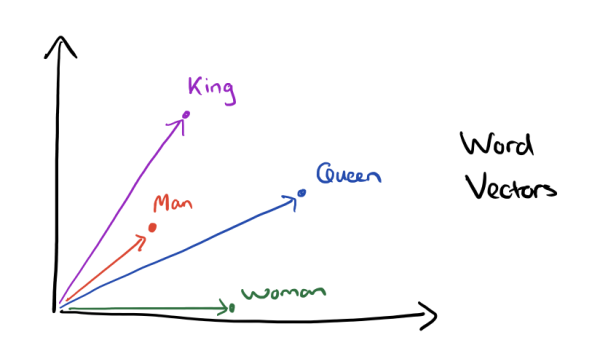



## Getting cosine similarities from spaCy

To get the cosine similarity between two words in `spaCy`, all you have to do is get a `Doc` object from it (`nlp("Some string")`) and use the function `.similarity(nlp("Some other string"))`.

This method will be extremely handy if you do not want to have to decide how to combine words. `spaCy` will make that decision for you.

In [8]:
my_vectors = [token.vector for token in one_paragraph]
for i, w1 in enumerate(one_paragraph):
  word = w1
  if i < len(one_paragraph) - 1:
    next_word = one_paragraph[i + 1]
    if word.text in nlp.vocab and next_word.text in nlp.vocab:
      # spacy-specific calculation
      print(word, next_word,
            word.similarity(next_word))

The family 0.36924893
family lives 0.61954117
lives next 0.33052397
next to 0.50991803
to a 0.5058919
a dark 0.35115254
dark forest 0.42405438
forest , 0.17195591
, a 0.22088856
a place 0.49071392
place tied 0.3527677
tied to 0.2526665
to witchcraft 0.094787896
witchcraft in 0.11301455
in their 0.44332957
their culture 0.37607408
culture , 0.19468924
, whichunderlines 0.0
whichunderlines the 0.0
the conflict 0.3935516
conflict between 0.4889411
between their 0.4054287
their civilized 0.2556196
civilized , 0.11472741
, patriarchal -0.04180882
patriarchal religion 0.44539514
religion and 0.30326703
and the 0.5624872
the Gothic 0.121763475
Gothic , 0.06901229
, wild 0.23387046
wild natural 0.45349088
natural world 0.4181581
world that 0.52450436
that surrounds 0.310818
surrounds them 0.15519771
them . 0.42722952


/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


# Latent semantic analysis using NLTK and scikit-learn's `CountVectorizer`

In [9]:
from google.colab import drive, files

abstract_file = files.upload()

abstracts = abstract_file['abstracts.tsv'].decode("utf-8").split('\n')

Saving abstracts.tsv to abstracts (4).tsv


The easiest method to learn word embeddings is to build a pipeline that implements Latent Semantic Analysis. The basic ingredients are as follows:

1. Bag-of-words representations (using a sparse matrix package)
2. Principal components analysis (PCA)
  * Decide the number of dimensions you want
  * Decided on whether to trim dimensions based on variance explained

Bag-of-words preprocessing using `nltk.word_tokenize` and `sklearn.feature_extraction.text.CountVectorizer`

In [10]:
import nltk
nltk.download("punkt")
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=word_tokenize, stop_words=None)
bow_abstracts = vectorizer.fit_transform(abstracts)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
bow_abstracts

<27471x74320 sparse matrix of type '<class 'numpy.int64'>'
	with 2524226 stored elements in Compressed Sparse Row format>

### Quiz yourself:

<details>
<summary>How many dimensions does this matrix have in it (how large is its vocabulary)? 
</summary>
74,320 vocabulary items </details>

<details>
<summary>How many documents are in the corpus?
</summary>
27,471 documents </details>

<details>
<summary>How many total words are in the corpus?
</summary>
2,524,226 words </details>



## Principal Components Analysis

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1280px-GaussianScatterPCA.svg.png" width=500/> 

By <a href="//commons.wikimedia.org/wiki/User:Nicoguaro" title="User:Nicoguaro">Nicoguaro</a> - <span class="int-own-work" lang="en">Own work</span> <a href="https://creativecommons.org/licenses/by/4.0" title="Creative Commons Attribution 4.0">CC BY 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=46871195">Link</a>

</center>

The goal of PCA is to learn several dimensions that are geometrically **orthogonal** or statistically **uncorrelated** from the other dimensions. We can use PCA to transform large, complex spaces with correlations into smaller, more orderly spaces.

The output of principle components analysis is a **projection matrix** that will correspond to all input dimensions and their lower-dimensional representations. For our purposes this means we get **lower-dimensional, latent vector representations of words**. But, we can also use this projection matrix to transform all of our documents (e.g., each abstract) into a latent document representation, too. Let's get a sense of how this works.

We can use `scikit-learn` to build a Principal Components Analysis model as well.

In [12]:
from sklearn.decomposition import TruncatedSVD

N_COMPONENTS = 100

pca = TruncatedSVD(n_components=N_COMPONENTS)
pca.fit(bow_abstracts)

TruncatedSVD(algorithm='randomized', n_components=100, n_iter=5,
             random_state=None, tol=0.0)

In [13]:
pca.components_.shape

(100, 74320)

In [14]:
pca.components_[0].shape # 0th dimension values for all vocabulary items

(74320,)

In [23]:
# let's look at the most similar words to 'parsing'
# or any other word of your choice
from sklearn.metrics.pairwise import cosine_similarity

_index = vectorizer.vocabulary_['parsing']
word_similarities = cosine_similarity(word_vectors[_index].reshape(1, -1),
                                      word_vectors)
_to_similarities = dict(zip(vectorizer.get_feature_names(),
                            word_similarities[0].tolist()))
dict(sorted(_to_similarities.items(), key=lambda item: item[1])[-15:])

{'arc-factored': 0.8840575850162297,
 'constituency': 0.9412543152275252,
 'dependency': 0.9359031491649503,
 'head-ordered': 0.8929030664433473,
 'headedness': 0.8971223879193222,
 'non-projective': 0.8934490249143485,
 'parse': 0.9178320233711813,
 'parser': 0.9609996960832461,
 'parsers': 0.9613515296980633,
 'parses': 0.8894677776684567,
 'parsing': 1.0,
 'projective': 0.927030419582455,
 'shift-reduce': 0.9023690015430454,
 'transition-based': 0.9553284554483784,
 'trees': 0.9222818710380117}

In [24]:
# try again with algorithms, or any other word of your choice
_index = vectorizer.vocabulary_['algorithms']
word_similarities = cosine_similarity(word_vectors[_index].reshape(1, -1),
                                      word_vectors)
_to_similarities = dict(zip(vectorizer.get_feature_names(),
                            word_similarities[0].tolist()))
dict(sorted(_to_similarities.items(), key=lambda item: item[1])[-15:])

{'algorithm': 0.6787354599896717,
 'algorithms': 0.9999999999999997,
 'combinatorial': 0.538457783298863,
 'context-free': 0.5525434023028737,
 'decision': 0.520586621549094,
 'equations': 0.5229200927024704,
 'grammars': 0.514520267271751,
 'martins': 0.5193095516154502,
 'optimization': 0.584790418934797,
 'problems': 0.566991271591525,
 'programming': 0.5928223287714491,
 'stochastic': 0.5832391069897067,
 'subgradient': 0.5140421475169243,
 'techniques': 0.6237805899548496,
 'tractable': 0.5807758927746145}

# Interpreting the word vector dimensions

Finally, we can try to interpret the top words for each dimension, let's just try the first 10 dimensions:

In [25]:
for dim in range(15):
  dim_vecs = word_vectors.T[dim]
  dim_vecs_named = dict(zip(vectorizer.get_feature_names(),
                            dim_vecs.tolist()))
  print(dim)
  print('\t'.join([x[0] for x in sorted(dim_vecs_named.items(), key=lambda item: item[1])[-10:]]))
  print("-" * 100)

0
in	to	a	{	}	and	of	.	,	the
----------------------------------------------------------------------------------------------------
1
l	les	la	des	d	'	de	\'e	{	}
----------------------------------------------------------------------------------------------------
2
that	models	to	a	.	(	)	we	and	,
----------------------------------------------------------------------------------------------------
3
annotation	et	corpus	;	of	and	(	)	the	,
----------------------------------------------------------------------------------------------------
4
linguistic	analysis	annotation	as	in	for	corpus	and	a	of
----------------------------------------------------------------------------------------------------
5
translation	\	language	:	;	of	for	and	(	)
----------------------------------------------------------------------------------------------------
6
by	model	that	;	is	,	of	(	)	a
----------------------------------------------------------------------------------------------------
7
108	100	114	116	105	1